In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### `Dealing with missing data`
It is important to deal with missing data before starting your analysis.

One approach is to drop missing values if they account for a small proportion, typically five percent, of your data.

Working with a dataset on plane ticket prices, stored as a pandas DataFrame called __planes__, you'll need to count the number of missing values across all columns, calculate five percent of all values, use this threshold to remove observations, and check how many missing values remain in the dataset.

In [2]:
planes = pd.read_csv('../datasets/planes.csv')

- Print the number of missing values in each column of the DataFrame.

In [3]:
# Count the number of missing values in each column
print(planes.isnull().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


- Calculate how many observations five percent of the __planes__ DataFrame is equal to.

In [4]:
# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05
print(threshold)

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64
533.0


- Create __cols_to_drop__ by applying boolean indexing to columns of the DataFrame with missing values less than or equal to the threshold.
- Use this filter to remove missing values and save the updated DataFrame.

In [5]:
# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05

#  Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64
Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


In [6]:
cols_to_drop

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops'],
      dtype='object')

In [7]:
threshold

533.0

#### `Strategies for remaining missing data`
The five percent rule has worked nicely for your __planes__ dataset, eliminating missing values from nine out of 11 columns!

Now, you need to decide what to do with the "__Additional_Info__" and "__Price__" columns, which are missing ___300___ and ___368___ values respectively.

You'll first take a look at what "__Additional_Info__" contains, then visualize the price of plane tickets by different airlines.

The following imports have been made for you:
- __import pandas as pd__
- __import seaborn as sns__
- __import matplotlib.pyplot as plt__

In [8]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


- Print the values and _frequencies_ of "__Additional_Info__".

In [9]:
# Check the values of the Additional_Info column
print(planes['Additional_Info'].value_counts())

Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


- Create a boxplot of "__Price__" by "__Airline__".

Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


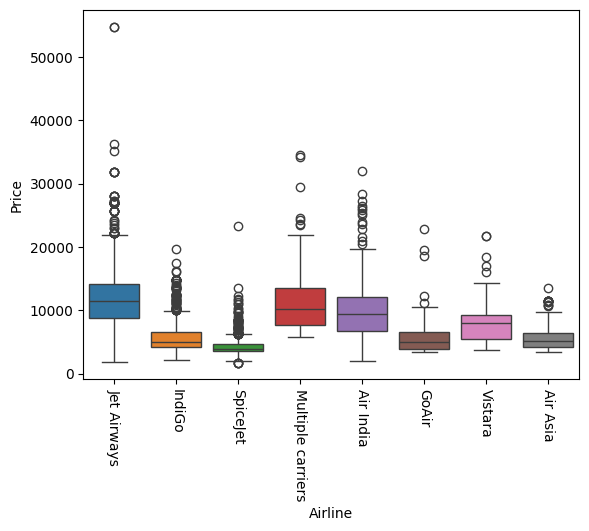

In [10]:
# Check the values of the Additional_Info column
print(planes["Additional_Info"].value_counts())

# Create a box plot of Price by Airline
sns.boxplot(data=planes, x='Airline', y='Price', hue='Airline', legend=False)
plt.xticks(rotation=270)

plt.show()

#### `Question`
How should you deal with the missing values in "__Additional_Info__" and "__Price__"?


#### `Possible answers`

- Remove the "__Additional_Info__" column and impute the mean for missing values of "__Price__".

- Remove "__No info__" values from "__Additional_Info__" and impute the median for missing values of "__Price__".

- Remove the "__Additional_Info__" column and impute the mean by "__Airline__" for missing values of "__Price__". Incorrect Submission: 
The "Price" distributions by "Airline" appear to have extreme values, so the mean isn't the best descriptive statistic to impute.

- `Remove the "__Additional_Info__" column and impute the median by "__Airline__" for missing values of "__Price__".` You don't need the "Additional_Info" column, and should impute median "Price" by "Airline" to accurately represent the data!

In [11]:
planes = planes.drop('Additional_Info', axis=1)

#### `Imputing missing plane prices`
Now there's just one column with missing values left!

You've removed the "__Additional_Info__" column from __planes—the__ last step is to _impute_ the missing data in the "__Price__" column of the dataset.

As a reminder, you generated this boxplot, which suggested that imputing the median price based on the "__Airline__" is a solid approach!
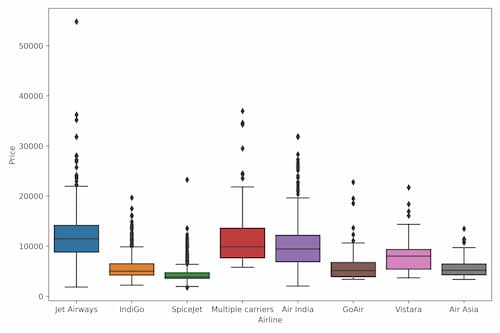

- Group __planes__ by airline and calculate the median price.

In [12]:
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()
  
print(airline_prices)

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64


- Convert the grouped median prices to a dictionary.

In [13]:
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()

print(airline_prices)

# Convert to a dictionary
prices_dict = airline_prices.to_dict()

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64


- Conditionally impute missing values for "__Price__" by mapping values in the "__Airline column__" based on __prices_dict__.
- Check for remaining missing values.

In [14]:
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()

print(airline_prices)

# Convert to a dictionary
prices_dict = airline_prices.to_dict()

# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isna().sum())

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64


#### `Finding the number of unique values`
You would like to practice some of the categorical data manipulation and analysis skills that you've just seen. To help identify which data could be reformatted to extract value, you are going to find out which non-numeric columns in the __planes__ dataset have a large number of unique values.

__pandas__ has been imported for you as __pd__, and the dataset has been stored as __planes__.

- Filter __planes__ for columns that are of "__object__" data type.
- Loop through the columns in the dataset.
- Add the column iterator to the print statement, then call the function to return the number of unique values in the column.

In [15]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes('object')

# Loop through columns
for column in non_numeric.columns:
  
  # Print the number of unique values
  print(f"Number of unique values in {column} column: ", non_numeric[column].nunique())

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Arrival_Time column:  1220
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5


#### `Flight duration categories`
As you saw, there are 362 unique values in the "__Duration__" column of __planes__. Calling __planes["Duration"].head()__, we see the following values:
- __0        19h__
- __1     5h 25m__
- __2     4h 45m__
- __3     2h 25m__
- __4    15h 30m__
- __Name: Duration, dtype: object__

Looks like this won't be simple to convert to numbers. However, you could categorize flights by duration and examine the frequency of different flight lengths!

You'll create a "__Duration_Category__" column in the __planes__ DataFrame. Before you can do this you'll need to create a list of the values you would like to insert into the DataFrame, followed by the existing values that these should be created from.

- Create a list of __categories__ containing "__Short-haul__", "__Medium__", and "__Long-haul__".

In [16]:
#  Create a list of categories
flight_categories = ['Short-haul', 'Medium', 'Long-haul']
flight_categories

['Short-haul', 'Medium', 'Long-haul']

- Create __short_flights__, a string to capture values of "__0h__", "___1h___", "___2h___", "___3h___", or "___4h___" taking care to avoid values such as "___10h___".
- Create __medium_flights__ to capture any values between five and nine hours.
- Create __long_flights__ to capture any values from ___10___ hours to ___16___ hours inclusive.

In [17]:
#  Create a list of categories
flight_categories = ["Short-haul", "Medium", "Long-haul"]

#  Create short_flights
short_flights = "^0h|^1h|^2h|^3h|^4h"

# Create medium_flights
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create long_flights
long_flights = "10h|11h|12h|13h|14h|15h|16h"

#### `Adding duration categories`
Now that you've set up the categories and values you want to capture, it's time to build a new column to analyze the frequency of flights by duration!

The variables __flight_categories__, __short_flights__, __medium_flights__, and __long_flights__ that you previously created are available to you.

Additionally, the following packages have been imported: __pandas__ as __pd__, __numpy__ as __np__, __seaborn__ as __sns__, and __matplotlib.pyplot__ as __plt__.

-   Create conditions, a list containing subsets of __planes["Duration"]__ based on __short_flights__, __medium_flights__, and __long_flights__.
- Create the "__Duration_Category__" column by calling a function that accepts your __conditions__ list and __flight_categories__, setting values not found to "__Extreme duration__".
- Create a plot showing the count of each category.

In [18]:
print(type(planes['Duration']))

<class 'pandas.core.series.Series'>


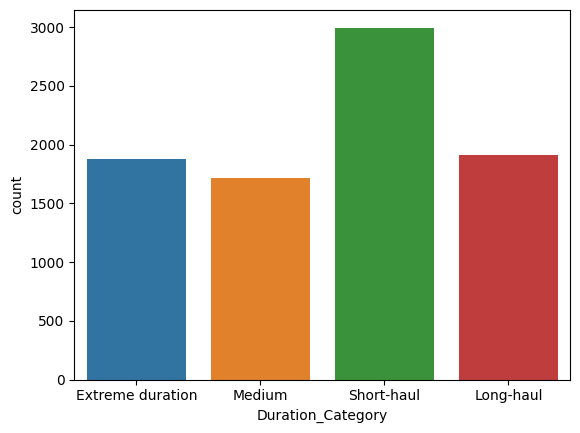

In [19]:
# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions,
                                        flight_categories,
                                        default="Extreme duration",
                                        )

#  Plot the counts of each category
sns.countplot(data=planes, x="Duration_Category", hue='Duration_Category', legend=False)
plt.show()

#### `Flight duration`
You would like to analyze the duration of flights, but unfortunately, the "__Duration__" column in the __planes__ DataFrame currently contains string values.

You'll need to clean the column and convert it to the correct data type for analysis.

- Print the first five values of the "__Duration__" column.

In [20]:
#  Preview the column
print(planes['Duration'].head())

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object


- Remove "__h__" from the column.

In [21]:
#  Preview the column
print(planes["Duration"].head())

#  Remove the string character
planes["Duration"] = planes["Duration"].str.replace("h", '')
planes['Duration']

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object


0            19
1         5 25m
2         4 45m
3         2 25m
4        15 30m
          ...  
10654     2 40m
10655     2 30m
10656     2 35m
10658     2 40m
10659     8 20m
Name: Duration, Length: 8508, dtype: object

- Convert the column to __float__ data type.

In [22]:
# #  Preview the column
# print(planes["Duration"].head())

# #  Remove the string character
# planes["Duration"] = planes["Duration"].str.replace("h", "").str.replace('m', "")

# # Convert to float data type
# planes["Duration"] = planes["Duration"].astype(float)

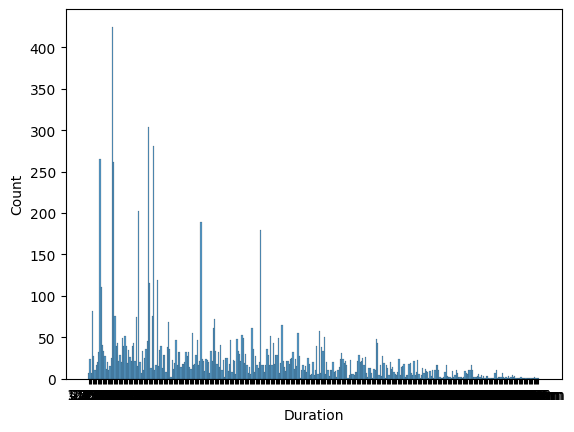

In [23]:
# #  Preview the column
# print(planes["Duration"].head())

# #  Remove the string character
# planes["Duration"] = planes["Duration"].str.replace("h", "")

# # Convert to float data type
# planes["Duration"] = planes["Duration"].astype(float)

#  Plot a histogram
sns.histplot(data=planes, x="Duration")
plt.show()

In [24]:
def convert_duration(duration_str):
    # Check if the input is a string
    if isinstance(duration_str, str):
        parts = duration_str.split()
        hours = 0
        minutes = 0

        # Extract the hours and minutes
        for part in parts:
            if part.endswith('h'):
                hours = float(part[:-1])
            elif part.endswith('m'):
                minutes = float(part[:-1])

        # Calculate the total duration in hours
        total_hours = hours + (minutes / 60)

        return total_hours
    else:
        return duration_str


# Apply the conversion function to the "Duration" column
planes["Duration"] = planes["Duration"].apply(convert_duration)

# Print the updated "Duration" column
print(planes["Duration"].head())

0    0.000000
1    0.416667
2    0.750000
3    0.416667
4    0.500000
Name: Duration, dtype: float64


In [25]:
planes = pd.read_csv('../datasets/planes.csv')
def convert_duration(duration_str):
    # Check if the input is a string
    if isinstance(duration_str, str):
        parts = duration_str.split()
        hours = 0
        minutes = 0

        # Extract the hours and minutes
        for part in parts:
            if part.endswith('h'):
                hours = float(part[:-1])
            elif part.endswith('m'):
                minutes = float(part[:-1])

        # Calculate the total duration in hours
        total_hours = hours + (minutes / 60)

        return total_hours
    else:
        return duration_str


# Apply the conversion function to the "Duration" column
planes["Duration"] = planes["Duration"].apply(convert_duration)
planes['Duration']

0        19.000000
1         5.416667
2         4.750000
3         2.416667
4        15.500000
           ...    
10655     2.500000
10656     2.583333
10657     3.000000
10658     2.666667
10659     8.333333
Name: Duration, Length: 10660, dtype: float64

#### `Adding descriptive statistics`
Now "__Duration__" and "__Price__" both contain numeric values in the __planes__ DataFrame, you would like to calculate summary statistics for them that are conditional on values in other columns.

- Add a column to __planes__ containing the standard deviation of "__Price__" based on "__Airline__".

In [26]:
# Price standard deviation by Airline
planes["airline_price_st_dev"] = planes.groupby(
    "Airline")["Price"].transform(lambda x: x.std())

print(planes[["Airline", "airline_price_st_dev"]].value_counts())

Airline            airline_price_st_dev
Jet Airways        4230.748840             3685
IndiGo             2266.753552             1981
Air India          3865.871975             1686
Multiple carriers  3763.674706             1148
SpiceJet           1790.851944              787
Vistara            2864.267802              455
Air Asia           2016.738954              309
GoAir              2790.815129              182
Name: count, dtype: int64


- Calculate the _median_ for "__Duration__" by "__Airline__", storing it as a column called "__airline_median_duration__".

In [27]:
# Median Duration by Airline
planes["airline_median_duration"] = planes.groupby(
    "Airline")["Duration"].transform(lambda x: x.median())

print(planes[["Airline", "airline_median_duration"]].value_counts())

Airline            airline_median_duration
Jet Airways        13.333333                  3685
IndiGo             2.916667                   1981
Air India          15.916667                  1686
Multiple carriers  10.250000                  1148
SpiceJet           2.500000                    787
Vistara            3.166667                    455
Air Asia           2.833333                    309
GoAir              5.166667                    182
Name: count, dtype: int64


- Find the _mean_ "__Price__" by "__Destination__", saving it as a column called "__price_destination_mean__".

In [28]:
# Mean Price by Destination
planes["price_destination_mean"] = planes.groupby(
    "Destination")["Price"].transform(lambda x: x.mean())

print(planes[["Destination", "price_destination_mean"]].value_counts())

Destination  price_destination_mean
Cochin       10506.993486              4391
Banglore     9132.225153               2773
Delhi        5157.794118               1219
New Delhi    11738.589499               888
Hyderabad    5025.210280                673
Kolkata      4801.489796                369
Name: count, dtype: int64


#### `What to do with outliers`
Identifying and dealing with outliers is an integral step in performing exploratory data analysis.

In this exercise, you'll be presented with scenarios where outliers are present, and you need to decide what action you should take.

- Place each scenario into the appropriate bucket depending on what approach should be taken to deal with the outlier(s).
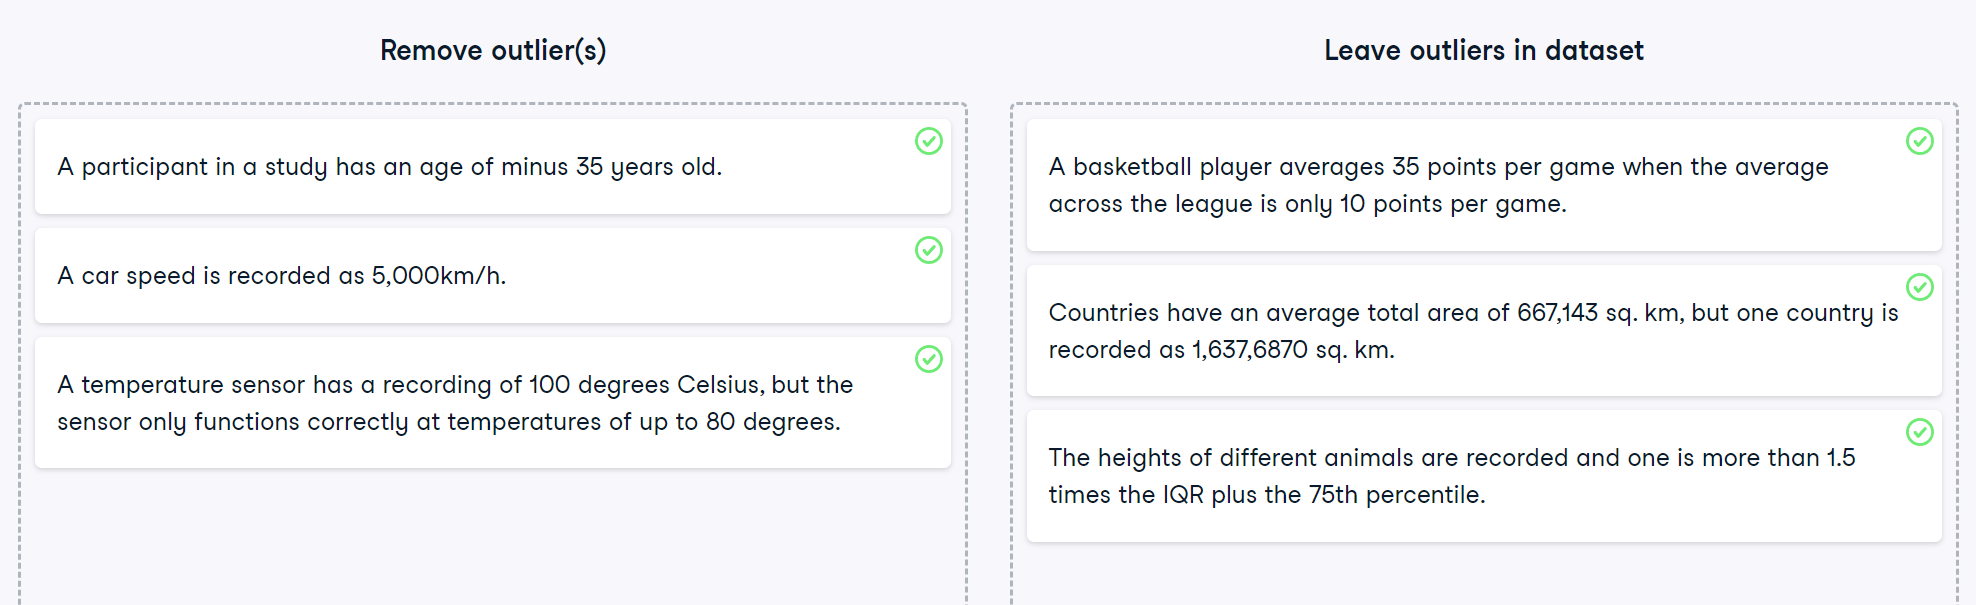

#### `Identifying outliers`
You've proven that you recognize what to do when presented with outliers, but can you identify them using visualizations?

Try to figure out if there are outliers in the "__Price__" or "__Duration__" columns of the __planes__ DataFrame.

__matplotlib.pyplot__ and __seaborn__ have been imported for you as __plt__ and __sns__ respectively.

- Plot the distribution of "__Price__" column from __planes__.

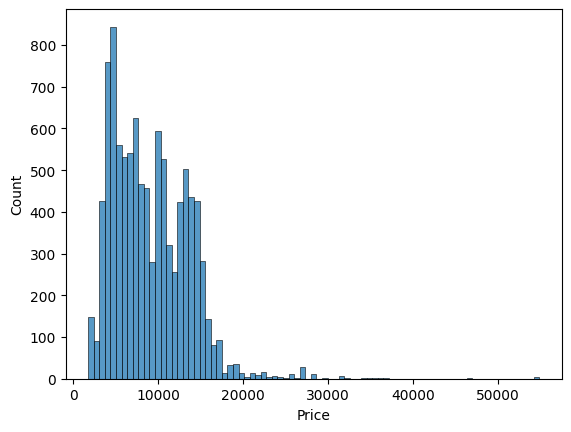

In [29]:
#  Plot a histogram of flight prices
sns.histplot(x='Price', data=planes)
plt.show()

- Display the descriptive statistics for flight duration.

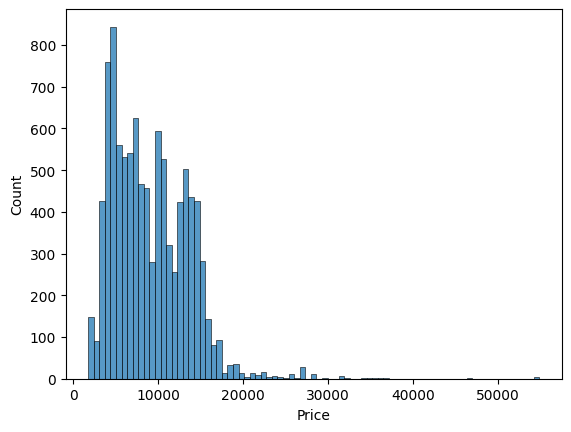

count    10446.000000
mean        10.723818
std          8.472312
min          0.083333
25%          2.833333
50%          8.666667
75%         15.500000
max         47.666667
Name: Duration, dtype: float64


In [30]:
#  Plot a histogram of flight prices
sns.histplot(data=planes, x="Price")
plt.show()

# Display descriptive statistics for flight duration
print(planes['Duration'].describe())

#### `Question`
Which column potentially contains outliers?

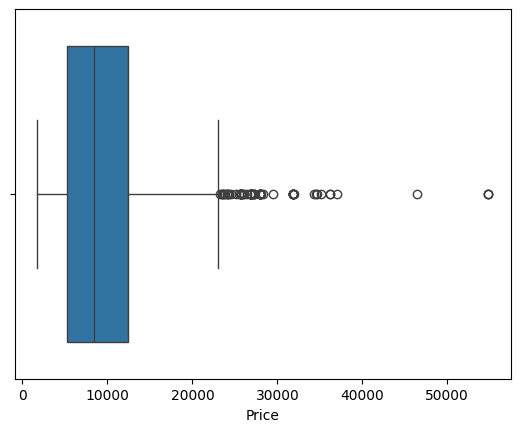

In [31]:
sns.boxplot(data=planes, x="Price")
plt.show()

#### `Possible answers`


- "__Price__"
- "__Duration__"
- "__Price__" and "__Duration__." Histograms, boxplots, and descriptive statistics are also useful methods for identifying extreme values. Now let's deal with them!

- Neither


#### `Removing outliers`
While removing outliers isn't always the way to go, for your analysis, you've decided that you will only include flights where the "__Price__" is not an outlier.

Therefore, you need to find the upper threshold and then use it to remove values above this from the __planes__ DataFrame.

__pandas__ has been imported for you as __pd__, along with __seaborn__ as __sns__.

- Find the ___75th___ and ___25th___ percentiles, saving as __price_seventy_fifth__ and __price_twenty_fifth__ respectively.

In [32]:
# Find the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

- Calculate the __IQR__, storing it as __prices_iqr__.

In [33]:
# Find the 75th and 25th percentiles
price_upper_perc = planes["Price"].quantile(0.75)
price_lower_perc = planes["Price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_upper_perc-price_lower_perc

print('Q1: ', price_twenty_fifth)
print('Q3: ', price_seventy_fifth)
print('1QR: ', prices_iqr)

Q1:  5276.75
Q3:  12373.0
1QR:  7096.25


- Calculate the _upper_ and _lower_ outlier thresholds.

In [34]:
# Find the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

In [35]:
lower, upper

(-5367.625, 23017.375)

<Axes: ylabel='Price'>

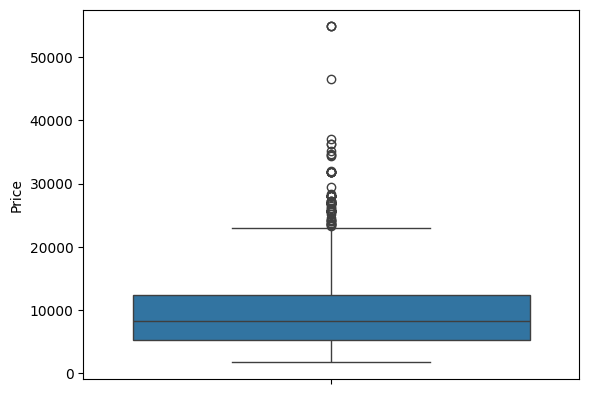

In [36]:
sns.boxplot(planes['Price'])

- Remove the _outliers_ from __planes__.

In [37]:
# Find the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Subset the data
planes_new = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]

print(planes_new["Price"].describe())

count     9959.000000
mean      8875.160860
std       4057.202002
min       1759.000000
25%       5228.000000
50%       8283.000000
75%      12284.000000
max      23001.000000
Name: Price, dtype: float64


<Axes: ylabel='Price'>

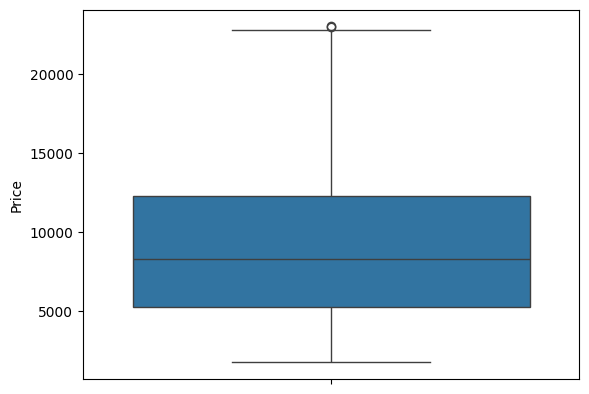

In [38]:
sns.boxplot(planes_new['Price'])

In [39]:
planes_new['Total_Stops'].value_counts()

Total_Stops
1 stop      5140
non-stop    3238
2 stops     1396
3 stops       40
4 stops        1
Name: count, dtype: int64

In [40]:
planes_new['Total_Stops'].head()

0     2 stops
1      1 stop
2      1 stop
3    non-stop
4      1 stop
Name: Total_Stops, dtype: object

In [41]:
# Mengganti nilai "non-stop" menjadi "0"
planes_new['Total_Stops'] = planes_new['Total_Stops'].str.replace("non-stop", "0")
planes_new['Total_Stops'] = planes_new['Total_Stops'].str.replace(' stops', '')
planes_new['Total_Stops'] = planes_new['Total_Stops'].str.replace(' stop', '')


# Mengisi nilai NaN dengan "0"
planes_new['Total_Stops'] = planes_new['Total_Stops'].fillna("0")

# # Konversi tipe data ke integer
planes_new['Total_Stops'] = planes_new['Total_Stops'].astype(int)

C:\Users\Albert\AppData\Local\Temp\ipykernel_13452\645988016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planes_new['Total_Stops'] = planes_new['Total_Stops'].str.replace("non-stop", "0")
C:\Users\Albert\AppData\Local\Temp\ipykernel_13452\645988016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planes_new['Total_Stops'] = planes_new['Total_Stops'].str.replace(' stops', '')
C:\Users\Albert\AppData\Local\Temp\ipykernel_13452\645988016.py:4: SettingWithCopyWarning: 
A value is trying to be set on 

In [63]:
planes_new['Total_Stops'].value_counts()

Total_Stops
1    5140
0    3382
2    1396
3      40
4       1
Name: count, dtype: int64

In [43]:
# # Konversi tipe data ke integer
# planes_new['Total_Stops'] = planes_new['Total_Stops'].astype(int)

In [44]:
planes_new['Total_Stops'].dtype

dtype('int32')

In [45]:
# planes_new['Total_Stops'] = planes_new['Total_Stops'].str.replace(" stops", "")
# planes_new['Total_Stops'] = planes_new['Total_Stops'].str.replace(" stop", "")
# planes_new['Total_Stops'] = planes_new['Total_Stops'].str.replace("non-stop", "0")
# planes_new['Total_Stops'] = planes_new['Total_Stops'].astype(int)

In [46]:
anjay = planes_new[['Duration', 'Total_Stops', 'Price']]

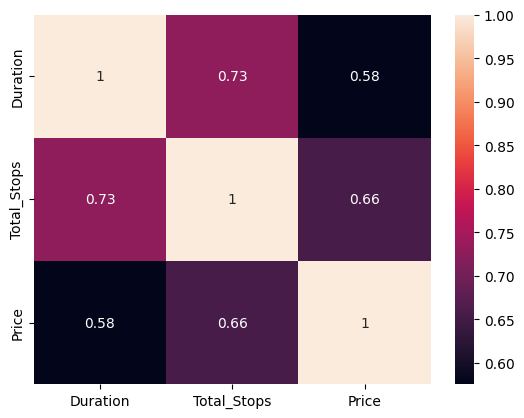

In [47]:
sns.heatmap(anjay.corr(), annot=True)
plt.show()

In [48]:
print(planes_new.dtypes)

Airline                     object
Date_of_Journey             object
Source                      object
Destination                 object
Route                       object
Dep_Time                    object
Arrival_Time                object
Duration                   float64
Total_Stops                  int32
Additional_Info             object
Price                      float64
airline_price_st_dev       float64
airline_median_duration    float64
price_destination_mean     float64
dtype: object


In [49]:
planes_new['Date_of_Journey'] = pd.to_datetime(planes_new['Date_of_Journey'], format='%d/%m/%Y')
planes_new['Dep_Time'] = pd.to_datetime(planes_new['Dep_Time'])
planes_new['Arrival_Time'] = pd.to_datetime(planes_new['Arrival_Time'])

C:\Users\Albert\AppData\Local\Temp\ipykernel_13452\2400242182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planes_new['Date_of_Journey'] = pd.to_datetime(planes_new['Date_of_Journey'], format='%d/%m/%Y')
C:\Users\Albert\AppData\Local\Temp\ipykernel_13452\2400242182.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  planes_new['Dep_Time'] = pd.to_datetime(planes_new['Dep_Time'])
C:\Users\Albert\AppData\Local\Temp\ipykernel_13452\2400242182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [50]:
planes_new.dtypes

Airline                            object
Date_of_Journey            datetime64[ns]
Source                             object
Destination                        object
Route                              object
Dep_Time                   datetime64[ns]
Arrival_Time               datetime64[ns]
Duration                          float64
Total_Stops                         int32
Additional_Info                    object
Price                             float64
airline_price_st_dev              float64
airline_median_duration           float64
price_destination_mean            float64
dtype: object

In [51]:
planes_new['month'] = planes_new['Date_of_Journey'].dt.month
planes_new['weekday'] = planes_new['Date_of_Journey'].dt.weekday
planes_new[['month', 'weekday', 'Date_of_Journey']].head()

C:\Users\Albert\AppData\Local\Temp\ipykernel_13452\2065861822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planes_new['month'] = planes_new['Date_of_Journey'].dt.month
C:\Users\Albert\AppData\Local\Temp\ipykernel_13452\2065861822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planes_new['weekday'] = planes_new['Date_of_Journey'].dt.weekday


,month,weekday,Date_of_Journey
0,6.0,6.0,2019-06-09
1,5.0,6.0,2019-05-12
2,3.0,4.0,2019-03-01
3,6.0,0.0,2019-06-24
4,3.0,1.0,2019-03-12


In [52]:
planes_new['Dep_Hour'] = planes_new['Dep_Time'].dt.hour
planes_new['Arrival_Hour'] = planes_new['Arrival_Time'].dt.hour

C:\Users\Albert\AppData\Local\Temp\ipykernel_13452\1169163194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planes_new['Dep_Hour'] = planes_new['Dep_Time'].dt.hour
C:\Users\Albert\AppData\Local\Temp\ipykernel_13452\1169163194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planes_new['Arrival_Hour'] = planes_new['Arrival_Time'].dt.hour


In [53]:
anjay = planes_new[['Duration', 'Total_Stops', 'Price',
                    'month', 'weekday', 'Dep_Hour', 'Arrival_Hour']]

<Axes: >

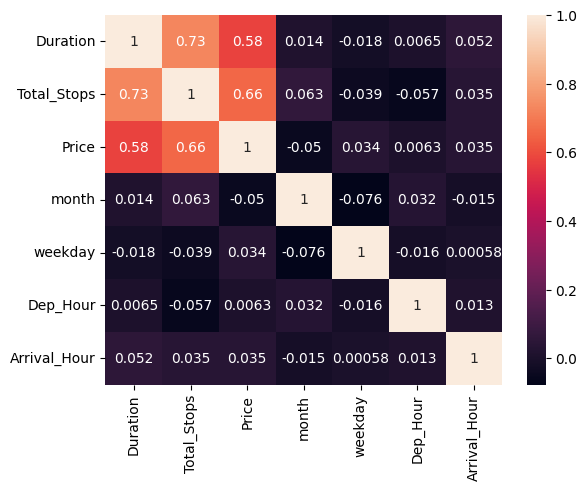

In [54]:
sns.heatmap(anjay.corr(), annot=True)

In [55]:
planes['Price'].describe()

count    10044.000000
mean      9044.411191
std       4472.304869
min       1759.000000
25%       5276.750000
50%       8366.000000
75%      12373.000000
max      54826.000000
Name: Price, dtype: float64

In [56]:
IQ1 = planes_new['Price'].quantile(0.25)
median = planes_new['Price'].median()
IQ3 = planes_new['Price'].quantile(0.75)
maximum = planes_new['Price'].max()

In [57]:
labels = ['Economy', 'Premium Economy', 'Business Class', 'First Class']
bins = [0, IQ1, median, IQ3, maximum]

In [58]:
planes_new['Price_Category'] = pd.cut(planes_new['Price'], labels= labels, bins = bins)

C:\Users\Albert\AppData\Local\Temp\ipykernel_13452\392605183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planes_new['Price_Category'] = pd.cut(planes_new['Price'], labels= labels, bins = bins)


In [59]:
print(planes_new[['Price', 'Price_Category']].head())

     Price   Price_Category
0  13882.0      First Class
1   6218.0  Premium Economy
2  13302.0      First Class
3   3873.0          Economy
4  11087.0   Business Class


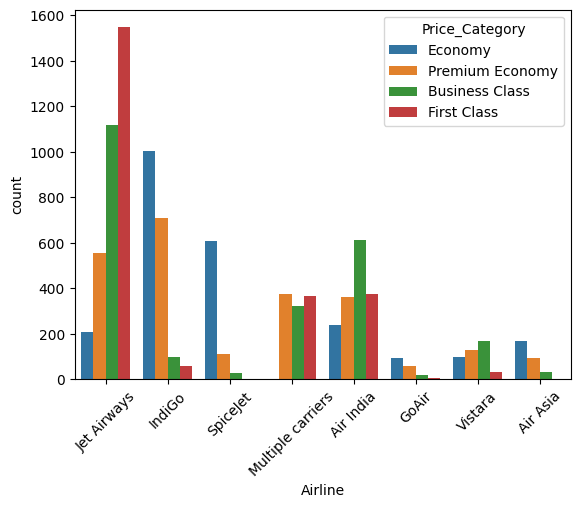

In [60]:
sns.countplot(data=planes_new, x='Airline', hue='Price_Category')
plt.xticks(rotation=45)
plt.show()

#### `spurious Correlation`

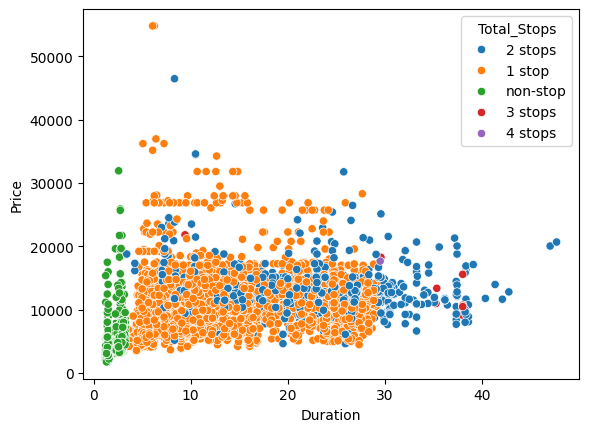

In [64]:
sns.scatterplot(data=planes, x='Duration', y='Price', hue='Total_Stops')
plt.show()

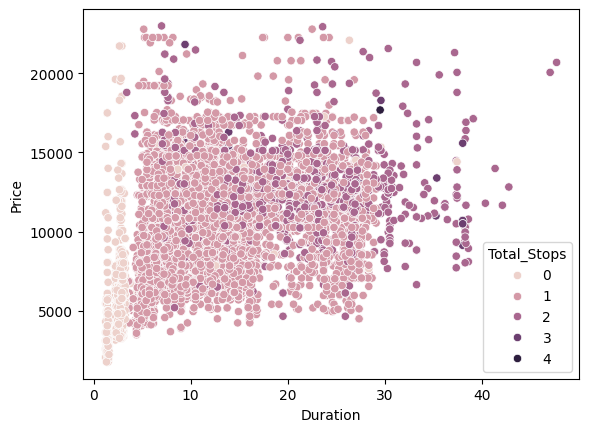

In [71]:
sns.scatterplot(data=planes_new, x='Duration', y='Price', hue='Total_Stops')
plt.show()

#### `Generating Hypotheses`

In [69]:
planes.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,airline_price_st_dev,airline_median_duration,price_destination_mean
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.0,2 stops,No info,13882.0,4230.74884,13.333333,10506.993486


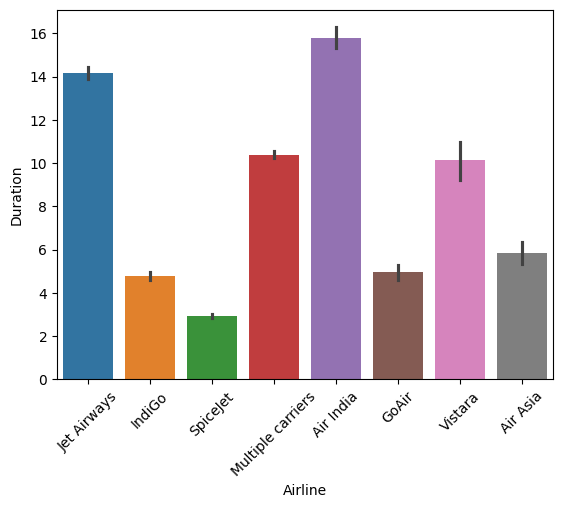

In [83]:
# plt.figure(figsize=(10, 8))
sns.barplot(data=planes_new, x='Airline', y='Duration', hue='Airline', legend=False)
plt.xticks(rotation=45)
plt.show()

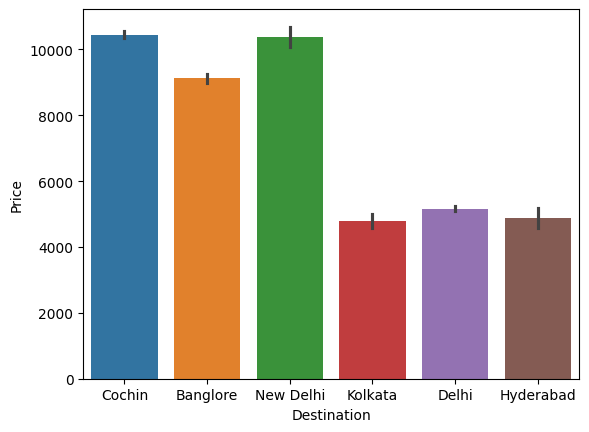

In [84]:
sns.barplot(data=planes_new, x='Destination', y='Price', hue='Destination', legend=False)
plt.show()

In [62]:
# Create salary labels